In [1]:
%cd ~/desktop/RNA/casp16
casp_id = "R0271"
pdb_dir=f"./datasets/casp16/{casp_id}/pdb"

/Users/sumishunsuke/Desktop/RNA/casp16


# calc energy 

In [3]:
!python ./scripts/eval_scores.py -h

usage: eval_scores.py [-h] [--pdb_dir PDB_DIR] [--out_dir OUT_DIR] [--print]
                      [--cpu CPU]

Evaluate potential scores

options:
  -h, --help         show this help message and exit
  --pdb_dir PDB_DIR  directory of pdb files
  --out_dir OUT_DIR  output directory
  --print            print output
  --cpu CPU          cpus


In [4]:
!ls {pdb_dir}/*pdb | wc -l

!python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir} --cpu 5

    1000
['S_000668.pdb', 'S_000654.pdb', 'S_000132.pdb', 'S_000126.pdb']


In [5]:
all_pdb_ids = !ls {pdb_dir}/*pdb | xargs -n 1 basename | cut -d. -f1
all_pdb_ids[:3]

['S_000001', 'S_000002', 'S_000003']

In [6]:
# re-proc

all_pdb_ids = !ls {pdb_dir}/*pdb | xargs -n 1 basename | cut -d. -f1
print(len(all_pdb_ids))

energies = {}
unprocessed = []
for pdb_id in all_pdb_ids:
    f = f"{pdb_dir}/{pdb_id}.briq.out"
    try:
        with open(f) as fh: lines = fh.readlines()
        energies[f] = float(lines[-1].strip().replace("Energy: ", ""))
    except:
        unprocessed.append(pdb_id)

print(len(energies), len(unprocessed))

1000
1000 0


# write energy 

In [7]:
out_files = !ls {pdb_dir}/*briq.out

pdb_energy = {}
for out in out_files:
    with open(out) as fh: 
        lines = fh.readlines()
    energies = float(lines[-1].strip().replace("Energy: ", ""))
    basename = out.split("/")[-1].replace(".briq.out", "")
    pdb_energy[basename] = energies


pdb_energy["S_000001"]

import pandas as pd
df_briq = pd.DataFrame(pdb_energy.items(), columns=["pdb", "BRiQscore"])
df_briq.head(3)

,pdb,BRiQscore
0,S_000001,-19.5417
1,S_000002,-48.3867
2,S_000003,52.2982


In [9]:
import pandas as pd 
df_farfar = pd.read_csv(f"{pdb_dir}/{casp_id}_AF3_FARFAR2_scores.csv")
df_farfar = df_farfar[["score", "description"]]
df_farfar.columns = ["FARFARscore", "pdb"]
df_farfar.head(3)

df = pd.merge(df_briq, df_farfar, on="pdb")
df.to_csv(f"{pdb_dir}/{casp_id}_scores.csv", index=False)

# 可視化

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(389, 3)


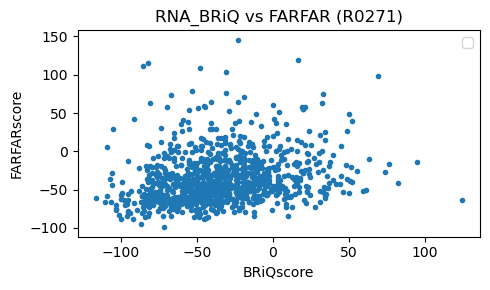

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores.csv")


n_take = 250
df_briq_top = df_scores.sort_values("BRiQscore", ascending=True).head(n_take)
df_farfar_top = df_scores.sort_values("FARFARscore", ascending=True).head(n_take)
df_both_top = pd.concat([df_briq_top, df_farfar_top]).drop_duplicates()


plt.figure(figsize=(5,3))
plt.scatter(df_scores["BRiQscore"], df_scores["FARFARscore"], marker=".")
# plt.scatter(df_both_top["BRiQscore"], df_both_top["FARFARscore"], marker=".", color="orange", label=f"Top {n_take}")
plt.legend()
plt.xlabel("BRiQscore")
plt.ylabel("FARFARscore")
plt.title(f"RNA_BRiQ vs FARFAR ({casp_id})")

print(df_both_top.shape)
plt.tight_layout()
plt.savefig(f"{pdb_dir}/{casp_id}_scores.pdf")

# 距離行列計算

In [11]:
%cd ~/desktop/RNA/casp16
# casp_id = "R1256"
pdb_dir=f"./datasets/casp16/{casp_id}/pdb"

from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/sumishunsuke/Desktop/RNA/casp16


In [12]:
!time python scripts/calc_rmsd.py --pdb_dir {pdb_dir} --cpu 6

['S_000001.pdb', 'S_000002.pdb', 'S_000003.pdb', 'S_000004.pdb', 'S_000005.pdb']
Number of pdb files: 1000
Calculating RMSD matrix 1000x1000 using 6 cpus
Calculating RMSD for 0th pdb file
Calculating RMSD for 90th pdb file
Calculating RMSD for 70th pdb file
Calculating RMSD for 50th pdb file
Calculating RMSD for 120th pdb file
Calculating RMSD for 30th pdb file
Calculating RMSD for 10th pdb file
Calculating RMSD for 100th pdb file
Calculating RMSD for 80th pdb file
Calculating RMSD for 60th pdb file
Calculating RMSD for 130th pdb file
Calculating RMSD for 40th pdb file
Calculating RMSD for 20th pdb file
Calculating RMSD for 110th pdb file
Calculating RMSD for 210th pdb file
Calculating RMSD for 160th pdb file
Calculating RMSD for 240th pdb file
Calculating RMSD for 270th pdb file
Calculating RMSD for 140th pdb file
Calculating RMSD for 190th pdb file
Calculating RMSD for 220th pdb file
Calculating RMSD for 170th pdb file
Calculating RMSD for 250th pdb file
Calculating RMSD for 280th pd

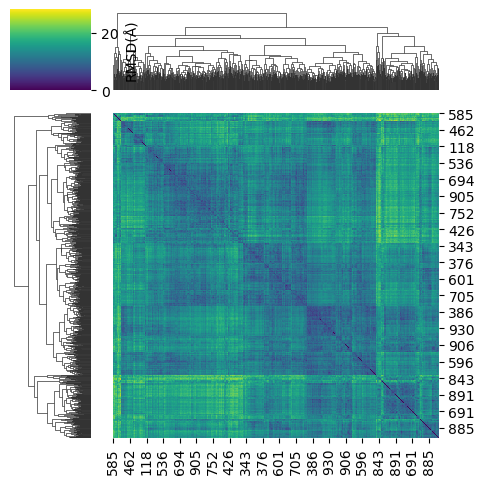

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
g = sns.clustermap(rmsd, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})
plt.tight_layout()
plt.savefig(f"{pdb_dir}/rmsd_clustermap.png", dpi = 300)

In [14]:
all_pdb_ids = !ls {pdb_dir}/*pdb | xargs -n 1 basename | cut -d. -f1
print(len(all_pdb_ids))
print(all_pdb_ids[:3])

1000
['S_000001', 'S_000002', 'S_000003']


# clustering

In [15]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

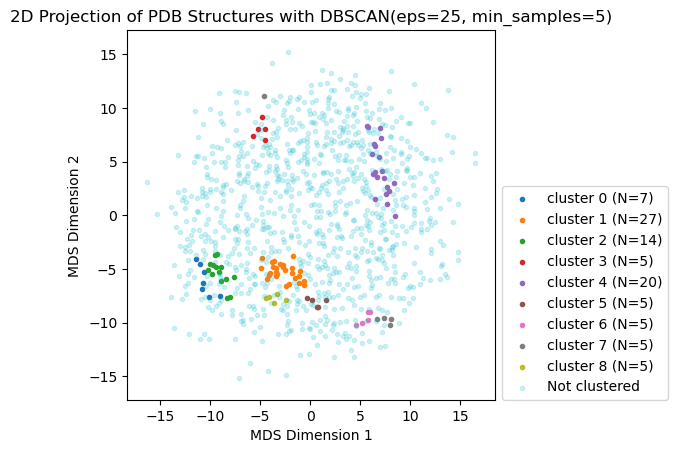

In [25]:
from sklearn.cluster import DBSCAN
eps = 25
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.subplots_adjust(right=0.7)
plt.savefig(f"{pdb_dir}/rmsd_mds_dbscan_eps{eps}_min_samples{min_samples}.png", dpi=300)
plt.show()


In [23]:
import pandas as pd

df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores.csv")
df_scores["cluster"] = clustering.labels_
df_scores.to_csv(f"{pdb_dir}/{casp_id}_scores_clustered_eps{eps}.csv", index=False)
df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores_clustered_eps{eps}.csv")
df_scores.head(3)

,pdb,BRiQscore,FARFARscore,cluster
0,S_000001,-19.5417,-44.630,0
1,S_000002,-48.3867,-46.791,0
2,S_000003,52.2982,39.651,-1


In [24]:
pdb_list = []

print(" Sorted by BRiQscore")
print(df_scores.sort_values("BRiQscore").head(10))
pdb_list.extend(df_scores.sort_values("BRiQscore").head(5)["pdb"].values)
print(" Sorted by FARFARscore")
print(df_scores.sort_values("FARFARscore").head(10))
pdb_list.extend(df_scores.sort_values("FARFARscore").head(5)["pdb"].values)
print("**"*20)



 Sorted by BRiQscore
          pdb  BRiQscore  FARFARscore  cluster
254  S_000255   -116.564      -61.520        0
810  S_000811   -110.841      -66.617        0
281  S_000282   -109.024        6.129        0
327  S_000328   -109.006      -57.844        0
212  S_000213   -107.168      -35.518       -1
236  S_000237   -106.612      -65.573       -1
567  S_000568   -106.125      -44.521        0
407  S_000408   -105.824      -27.833        0
277  S_000278   -105.141       29.310        0
708  S_000709   -103.541      -76.075        0
 Sorted by FARFARscore
          pdb  BRiQscore  FARFARscore  cluster
887  S_000888   -71.4712      -99.265        2
590  S_000591   -86.8694      -94.714       -1
99   S_000100   -99.6625      -88.431        0
770  S_000771   -45.0090      -87.902        0
190  S_000191   -92.2689      -87.856       -1
337  S_000338   -43.8915      -87.357        0
418  S_000419   -51.8288      -86.149        0
883  S_000884   -48.3732      -85.835        0
248  S_000249   